# Joining Data with dplyr
link: https://www.datacamp.com/courses/joining-data-with-dplyr-in-r

### Course Description
Often in data science, you'll encounter fascinating data that is spread across multiple tables. This course will teach you the skills you'll need to join multiple tables together to analyze them in combination. You'll practice your skills using a fun dataset about LEGOs from the Rebrickable website. The dataset contains information about the sets, parts, themes, and colors of LEGOs, but is spread across many tables. You'll work with the data throughout the course as you learn a total of six different joins! You'll learn four mutating joins: inner join, left join, right join, and full join, and two filtering joins: semi join and anti join. In the final chapter, you'll apply your new skills to Stack Overflow data, containing each of the almost 300,000 Stack Oveflow questions that are tagged with R, including information about their answers, the date they were asked, and their score. Get ready to take your dplyr skills to the next level!


### Note how can Resizing plots in the R kernel for Jupyter notebooks
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html

    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)
    
### Note2 Generate a table 

https://www.tablesgenerator.com/markdown_tables


other: Book: machine learning with R by Brett Lantz
Learn about `attr` function


### Note 2.2 RDS (Reading from a R data file)
Link: https://mgimond.github.io/ES218/Week02b.html

R has its own data file format–it’s usually saved using the .rds extension. To read a R data file, invoke the readRDS() function.

    dat <- readRDS("ACS.rds")
    
As with a CSV file, you can load a RDS file straight from a website, however, you must first run the file through a decompressor before attempting to load it via readRDS. A built-in decompressor function called gzcon can be used for this purpose.

    dat <- readRDS(gzcon(url("http://mgimond.github.io/ES218/Data/ACS.rds")))
    
The .rds file format is usually smaller than its text file counterpart and will therefore take up less storage space. The .rds file will also preserve data types and classes such as factors and dates eliminating the need to redefine data types after loading the file.



### Note 3 - DataFrames

In [1]:
library(dplyr)
library(tidyverse)

Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.5.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v readr   1.3.1
v tibble  2.1.3     v purrr   0.2.5
v tidyr   0.8.2     v stringr 1.4.0
v ggplot2 3.2.1     v forcats 0.3.0
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'tibble' was built under R version 3.5.3"Warning message:
"package 'readr' was built under R version 3.5.3"Warning message:
"package 'stringr' was built under R version 3.5.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
#readRDS(gzcon(url()))
sets<-readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5284/datasets/2e7cb938873ba685957efd822867c86f46dc6b78/sets.rds")))
themes<-readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5284/datasets/267bcb026359fb2104bf4b717ae166d0bd99c5e6/themes.rds")))
parts<-readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5284/datasets/cb649926d41ce73490a9bb710e1501a273061723/parts.rds")))
part_categories<-readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5284/datasets/30fc459770c89e46cce9cce99752ca95fb1d06fe/part_categories.rds")))
inventories<-readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5284/datasets/2b509dd7a49493ab990580be1845f21f36c46ca0/inventories.rds")))
inventory_parts<-readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5284/datasets/a49d7bf17fc35fdd1331c01a7f36573800e93cb4/inventory_parts.rds")))
colors<- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5284/datasets/aeeda0eaafe6b04c1e42da71a4e9fed7299d096e/colors.rds")))

In [10]:
head(parts)
head(part_categories)

part_num,name,part_cat_id
0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
0902,Baseplate 16 x 24 with Set 080 Small White House Print,1
0903,Baseplate 16 x 24 with Set 080 Red House Print,1
0904,Baseplate 16 x 24 with Set 080 Large White House Print,1
1,Homemaker Bookcase 2 x 4 x 4,7
10016414,Sticker Sheet #1 for 41055-1,58


id,name
1,Baseplates
3,Bricks Sloped
4,"Duplo, Quatro and Primo"
5,Bricks Special
6,Bricks Wedged
7,Containers


## 1) Joining Tables
Get started with your first joining verb: inner-join! You'll learn to join tables together to answer questions about the LEGO dataset, which contains information across many tables about the sets, parts, themes, and colors of LEGOs over time.


### 1.1) (video) The inner_join verb
maybe until this point, you have seen how can manipulate a set of data through `dplyr` package, but unfortunately it's very rare that you can has a set that contains all information that you need. so it's important build a skills that allow you fight with tihis kind of problem,  in this course we will working joining datasets, so first we are working with `inner_join` 

#### 1.1) Joining parts and part categories
- Add the correct joining verb, the name of the second table, and the joining column for the second table.
- Now, use the suffix argument to add "_part" and "_category" suffixes to replace the name.x and name.y fields.


In [17]:
head(inner_join(parts, part_categories, by = c("part_cat_id"="id")))

head(inner_join(parts, part_categories, by = c("part_cat_id"="id"), suffix = c("_part","_category")))

part_num,name.x,part_cat_id,name.y
0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1,Baseplates
0902,Baseplate 16 x 24 with Set 080 Small White House Print,1,Baseplates
0903,Baseplate 16 x 24 with Set 080 Red House Print,1,Baseplates
0904,Baseplate 16 x 24 with Set 080 Large White House Print,1,Baseplates
1,Homemaker Bookcase 2 x 4 x 4,7,Containers
10016414,Sticker Sheet #1 for 41055-1,58,Stickers


part_num,name_part,part_cat_id,name_category
0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1,Baseplates
0902,Baseplate 16 x 24 with Set 080 Small White House Print,1,Baseplates
0903,Baseplate 16 x 24 with Set 080 Red House Print,1,Baseplates
0904,Baseplate 16 x 24 with Set 080 Large White House Print,1,Baseplates
1,Homemaker Bookcase 2 x 4 x 4,7,Containers
10016414,Sticker Sheet #1 for 41055-1,58,Stickers


#### 1.1.2) Joining parts and inventories
**Exercise**
- Connect the parts and inventory_parts tables by their part numbers using an inner join.

*Answer*

In [20]:
head(parts %>% inner_join(inventory_parts, by = "part_num"))


part_num,name,part_cat_id,inventory_id,color_id,quantity
0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1,1973,2,1
0902,Baseplate 16 x 24 with Set 080 Small White House Print,1,1973,2,1
0903,Baseplate 16 x 24 with Set 080 Red House Print,1,1973,2,1
0904,Baseplate 16 x 24 with Set 080 Large White House Print,1,1973,2,1
1,Homemaker Bookcase 2 x 4 x 4,7,508,15,1
1,Homemaker Bookcase 2 x 4 x 4,7,1158,15,2


### 1.3) (video) Joining three or more tables
now you have seen how can join two table, we can extend this knowledge for three or more table, the idea is the same only need specify through which columns we will join our tables.

#### 1.3.1) Joining three tables
You can string together multiple joins with `inner_join` and the pipe (`%>%`), both with which you are already very familiar!

We'll now connect `sets`, a table that tells us about each LEGO kit, with `inventories`, a table that tells us the specific version of a given set, and finally to inventory_parts, a table which tells us how many of each part is available in each LEGO kit.

So if you were building a Batman LEGO `set`, sets would tell you the name of the set, `inventories` would give you IDs for each of the versions of the set, and inventory_parts would tell you how many of each part would be in each version.

**Exercise**
- Combine the inventories table with the sets table.
- Next, join the inventory_parts table to the table you created in the previous join by the inventory IDs.

*Answer*

In [9]:
head(sets %>% inner_join(inventories, by = "set_num") %>% 
     inner_join(inventory_parts, by = c("id"="inventory_id"))
    
    )

set_num,name,year,theme_id,id,version,part_num,color_id,quantity
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bdoor01,2,2
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bdoor01,15,1
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bdoor01,4,1
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bslot02,15,6
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bslot02,2,6
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bslot02,4,6


#### 1.3.2) What's the most common color?
Now let's join an additional table, colors, which will tell us the color of each part in each set, so that we can answer the question, "what is the most common color of a LEGO piece?"

**Exercise**
- Inner join the colors table using the color_id column from the previous join and the id column from colors; use the suffixes "_set" and "_color".
- 

*Answer*

In [13]:

head(
sets %>%
inner_join(inventories, by = "set_num") %>%
inner_join(inventory_parts, by = c("id" = "inventory_id")) %>%
inner_join(colors, by = c("color_id" = "id"), suffix = c("_set", "_color"))
)


head(sets %>%
inner_join(inventories, by = "set_num") %>%
inner_join(inventory_parts, by = c("id" = "inventory_id")) %>%
inner_join(colors, by = c("color_id" = "id"), suffix = c("_set", "_color")) %>% count(name_color, sort = TRUE)
)

set_num,name_set,year,theme_id,id,version,part_num,color_id,quantity,name_color,rgb
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bdoor01,2,2,Green,#237841
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bdoor01,15,1,White,#FFFFFF
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bdoor01,4,1,Red,#C91A09
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bslot02,15,6,White,#FFFFFF
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bslot02,2,6,Green,#237841
700.3-1,Medium Gift Set (ABB),1949,365,24197,1,bslot02,4,6,Red,#C91A09


name_color,n
Black,48068
White,30105
Light Bluish Gray,26024
Red,21602
Dark Bluish Gray,19948
Yellow,17088


## 2) Left and Right Joins
Learn two more mutating joins, the left and right join, which are mirror images of each other! You'll learn use cases for each type of join as you explore parts and colors of LEGO themes. Then, you'll explore how to join tables to themselves to understand the hierarchy of LEGO themes in the data

### 2.1) (video) The left_join verb
you have learned how can join two table , but maybe you have noticed that this kind of join only return value that are available into the two tables and the same time, so if we want to have the values that joined and the same time the values which aren't in one of them, we need other type of join.

#### 2.1.1)Left joining two sets by part and color
**Exercise**
- Combine the star_destroyer and millennium_falcon tables with the suffixes _falcon and _star_destroyer

*Answer*

In [6]:
inventory_parts_joined <- inventories %>% inner_join(inventory_parts, by = c("id"="inventory_id")) %>% 
select(-id,-version) %>%
arrange(desc(quantity))

In [7]:
millennium_falcon <- inventory_parts_joined %>%
  filter(set_num == "7965-1")

star_destroyer <- inventory_parts_joined %>%
  filter(set_num == "75190-1")


In [9]:
# Combine the star_destroyer and millennium_falcon tables
head(millennium_falcon %>% 
left_join(star_destroyer, by = c("part_num","color_id"), 
suffix = c("_falcon","_star_destroyer"))
)


set_num_falcon,part_num,color_id,quantity_falcon,set_num_star_destroyer,quantity_star_destroyer
7965-1,63868,71,62,NA,NA
7965-1,3023,0,60,NA,NA
7965-1,3021,72,46,75190-1,6
7965-1,2780,0,37,75190-1,36
7965-1,60478,72,36,NA,NA
7965-1,6636,71,34,75190-1,2
7965-1,3009,71,28,75190-1,2
7965-1,3665,71,22,NA,NA
7965-1,2412b,72,20,75190-1,11
7965-1,3010,71,19,NA,NA


### 2.3) (video) The right-join verb
maybe you will be thinking what happen if instead of keeping the elements from the first table, i would like to keep the elements from the second table, well this is possible and here is when you need other verb of dplyr `right_join`

#### 2.3.1) Counting part colors
Sometimes you'll want to do some processing before you do a join, and prioritize keeping the the second (right) table's rows instead. In this case, a right join is for you.

In the example below, we'll count the part_cat_id from parts, before using a right_join to join with part_categories. The reason we do this is because we don't only want to know the count of part_cat_id in parts, but we also want to know if there are any part_cat_ids not present in part_categories.

Note: we will see how to use `replace_na()`

**Exercise**
- Use the count verb to count each part_cat_id in the parts table.
- Use a right_join to join part_categories. You'll need to use the part_cat_id from the count and the id column from part_categories.
- filter for where the column n is NA.
*Answer*


In [6]:
head(
parts %>%
    count(part_cat_id) %>%
    right_join(part_categories, by = c("part_cat_id" = "id")) %>%
    # Filter for NA
    filter(is.na(n) == TRUE)
)

part_cat_id,n,name
66,NA,Modulex


#### 2.3.2) Cleaning up your count
In both left and right joins, there is the opportunity for there to be NA values in the resulting table. Fortunately, the `replace_na` function can turn those NAs into meaningful values.

**Exercise**
- Use replace_na to replace NAs in the n column with the value 0.

*Answer*

In [13]:
head(parts %>%
    count(part_cat_id) %>%
    right_join(part_categories, by = c("part_cat_id" = "id")) %>%
    # Use replace_na to replace missing values in the n column 
    replace_na(list(n = 0))
)

part_cat_id,n,name
1,135,Baseplates
3,303,Bricks Sloped
4,1900,"Duplo, Quatro and Primo"
5,107,Bricks Special
6,128,Bricks Wedged
7,97,Containers


### (video) 2.4)  Joining tables to themselves
You have seen how to join two tables, but it is important to know that it is possible to join a table with yourself, it is not very common but it is available, it is special with  the parent-child relationships  e.g:

    themes %>% 
        # Inner join the themes table
        inner_join(themes, by = c("id"="parent_id"), suffix = c("_parent","_child")) %>%
        # Filter for the "Harry Potter" parent name 
        filter(name_parent == "Harry Potter")



## 3) Full, Semi, and Anti Joins
In this chapter, you'll cover three more joining verbs: full-join, semi-join, and anti-join. You'll then use these verbs to answer questions about the similarities and differences between a variety of LEGO sets.

### 3.1) (video) The full_join verb
until this point you have seen how can use left or right join to keep all information from one table and full the  missing values with `NA` and   the same time if you want you can change them by a specif value with `replace.na from tidyr package` , but now you will learn how to keep all missing value from both tables to do that we use `full_join`

#### 3.1.1) Differences between Batman and Star Wars
In the video, you compared two sets. Now, you'll compare two themes, each of which is made up of many sets.

First, you'll need to join in the themes. Recall that doing so requires going through the sets first. You'll use the inventory_parts_joined table from the video, which is already available to you in the console.

**Exercise**
- In order to join in the themes, you'll first need to combine the sets and inventory_parts_joined tables.
- Then, combine the themes table with your first join, using the suffix argument to clarify which table each name came from ("_set" or "_theme").

*Answer*


In [3]:
#load:
inventory_parts_joined <- inventories %>%
  inner_join(inventory_parts, by = c("id" = "inventory_id")) %>%
  arrange(desc(quantity)) %>%
  select(-id, -version)

In [11]:
#answer
head(
inventory_parts_joined %>%
  # Combine the sets table with inventory_parts_joined 
  inner_join(sets, by = c("set_num")) %>% 
  # Combine the themes table with your first join 
  inner_join(themes, by = c("theme_id"="id"), suffix = c ("_set","_theme"))
)


set_num,part_num,color_id,quantity,name_set,year,theme_id,name_theme,parent_id
40179-1,3024,72,900,Personalised Mosaic Portrait,2016,277,Mosaic,276
40179-1,3024,15,900,Personalised Mosaic Portrait,2016,277,Mosaic,276
40179-1,3024,0,900,Personalised Mosaic Portrait,2016,277,Mosaic,276
40179-1,3024,71,900,Personalised Mosaic Portrait,2016,277,Mosaic,276
40179-1,3024,14,900,Personalised Mosaic Portrait,2016,277,Mosaic,276
k34434-1,3024,15,810,Lego Mosaic Tiger,2003,277,Mosaic,276


#### 3.1.2) Aggregating each theme
Previously, you combined tables to compare themes. Before doing this comparison, you'll want to aggregate the data to learn more about the pieces that are a part of each theme, as well as the colors of those pieces.

The table you created previously has been preloaded for you as inventory_sets_themes. It was filtered for each theme, and the objects have been saved as batman and star_wars

**Exercise**
- Count the part number and color id for the parts in Batman and Star Wars, weighted by quantity.

*Answer*

In [20]:
inventory_sets_themes <- inventory_parts_joined %>%
  inner_join(sets, by = "set_num") %>%
  inner_join(themes, by = c("theme_id" = "id"), suffix = c("_set", "_theme"))

batman <- inventory_sets_themes %>%
  filter(name_theme == "Batman")

star_wars <- inventory_sets_themes %>%
  filter(name_theme == "Star Wars")


#batman %>% filter(part_num == 3873,color_id ==0)

In [21]:
# Count the part number and color id, weight by quantity
head(
batman %>% count(part_num,color_id , wt = quantity) 
)

#star_wars %>% count(part_num,color_id , wt = quantity) 

part_num,color_id,n
10113,0,11
10113,272,1
10113,320,1
10183,57,1
10190,0,2
10201,0,1


#### 3.1.3) Full-joining Batman and Star Wars LEGO parts
Now that you've got separate tables for the pieces in the batman and star_wars themes, you'll want to be able to combine them to see any similarities or differences between the two themes. The aggregating from the last exercise has been saved as batman_parts and star_wars_parts, and is preloaded for you.

**Exercise**
- Combine the star_wars_parts table with the batman_parts table; use the suffix argument to include the "_batman" and "_star_wars" suffixes.
- Replace all the NA values in the n_batman and n_star_wars columns with 0s.

*Answer*

In [22]:
batman_parts <- batman %>%
  count(part_num, color_id, wt = quantity)

star_wars_parts <- star_wars %>%
  count(part_num, color_id, wt = quantity)

In [24]:
head(
batman_parts %>%
  # Combine the star_wars_parts table 
  full_join(star_wars_parts, by = c("part_num","color_id"), 
  suffix= c("_batman","_star_wars")) %>%
  # Replace NAs with 0s in the n_batman and n_star_wars columns 
  replace_na(list(n_batman =0, n_star_wars = 0))

)

part_num,color_id,n_batman,n_star_wars
10113,0,11,0
10113,272,1,0
10113,320,1,0
10183,57,1,0
10190,0,2,0
10201,0,1,21


### 3.2) (video) The semi- and anti-join verbs
now let's introduce a new class of join verbs, the `filtering joins`  this keeps or removes observations from the first table, but doesn't add new variables, there are:

- `semi_join` :  ask ... what observations in X(first table) are also in Y?
- `anti_join`:  ask..what observations in X are not in Y?

#### 3.2.1) omething within one set but not another
In the videos, you learned how to filter using the semi- and anti-join verbs to answer questions you have about your data. Let's focus on the batwing dataset, and use our skills to determine which parts are in both the batwing and batmobile sets, and which sets are in one, but not the other. While answering these questions, we'll also be determining whether or not the parts we're looking at in both sets also have the same color in common.

The batmobile and batwing datasets have been preloaded for you.

**Exercise**
- Filter the batwing set for parts that are also in the batmobile, whether or not they have the same color.
- Filter the batwing set for parts that aren't also in the batmobile, whether or not they have the same color.

*Answer*


In [4]:
#load
inventory_parts_joined <- inventories %>%
  inner_join(inventory_parts, by = c("id" = "inventory_id")) %>%
  arrange(desc(quantity)) %>%
  select(-id, -version)

batmobile <- inventory_parts_joined %>%
  filter(set_num == "7784-1") %>%
  select(-set_num)

batwing <- inventory_parts_joined %>%
  filter(set_num == "70916-1") %>%
  select(-set_num)

In [7]:
# Filter the batwing set for parts that are also in the batmobile set
head(
batwing %>% semi_join(batmobile, by = c("part_num"))
)

# Filter the batwing set for parts that aren't in the batmobile set
head(
batwing %>% anti_join(batmobile, by = c("part_num"))
)

part_num,color_id,quantity
3023,0,22
3024,0,22
3623,0,20
2780,0,17
3666,0,16
3710,0,14


part_num,color_id,quantity
11477,0,18
99207,71,18
22385,0,14
99563,0,13
10247,72,12
2877,72,12


### 3.3 (video)Visualizing set differences
You have already seen how to join or filter through unions, it is important to know that all these are your first steps to analyze your data, because you can manipulate them to create visualizations that help you understand your data. eg

Warning message:
"Removed 1 rows containing missing values (position_stack)."

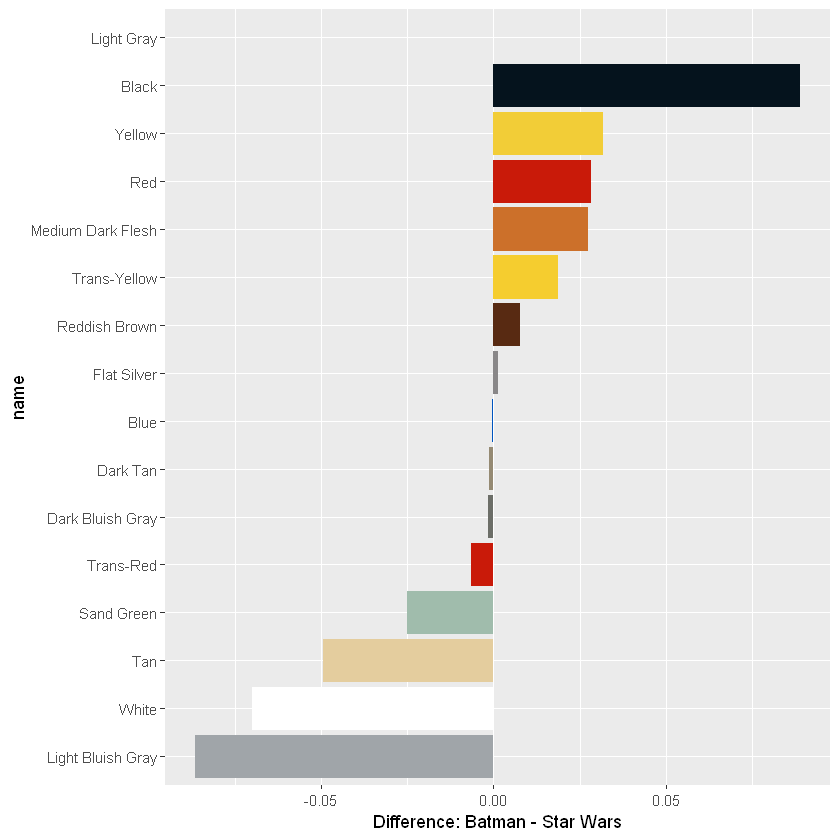

In [19]:
# load our data 
inventory_parts_themes <- inventories %>%
  inner_join(inventory_parts, by = c("id" = "inventory_id")) %>%
  arrange(desc(quantity)) %>%
  select(-id, -version) %>%
  inner_join(sets, by = "set_num") %>%
  inner_join(themes, by = c("theme_id" = "id"), suffix = c("_set", "_theme"))

    #  Filter and aggregate the Batman and Star Wars set data
    batman_colors <- inventory_parts_themes %>%
      # Filter the inventory_parts_themes table for the Batman theme
      filter( name_theme=="Batman") %>%
      group_by(color_id) %>%
      summarize(total = sum(quantity)) %>%
      # Add a percent column of the total divided by the sum of the total 
      mutate(percent = total / sum(total))

    # Filter and aggregate the Star Wars set data; add a percent column
    star_wars_colors <- inventory_parts_themes %>%
      # Filter the inventory_parts_themes table for the Batman theme
      filter( name_theme=="Star Wars") %>%
      group_by(color_id) %>%
      summarize(total = sum(quantity)) %>%
      # Add a percent column of the total divided by the sum of the total 
      mutate(percent = total / sum(total))


#Join two data set 
colors_joined <- batman_colors %>%
  full_join(star_wars_colors, by = "color_id", suffix = c("_batman", "_star_wars")) %>%
  replace_na(list(total_batman = 0, total_star_wars = 0)) %>%
  inner_join(colors, by = c("color_id" = "id")) %>%
  mutate(difference = percent_batman - percent_star_wars,
         total = total_batman + total_star_wars) %>%
  filter(total >= 200) %>%
  mutate(name = fct_reorder(name, difference))


# Create a bar plot using colors_joined and the name and difference columns
color_palette<-setNames(colors_joined$rgb, colors_joined$name)

ggplot(colors_joined , aes(name, difference, fill = name)) +
  geom_col() +
  coord_flip() +
  scale_fill_manual(values = color_palette, guide = FALSE) +
  labs(y = "Difference: Batman - Star Wars")

## 4) Case Study: Joins on Stack Overflow Data

Put together all the types of join you learned in this course to analyze a new dataset: Stack Overflow questions, answers, and tags. This includes calculating and visualizing trends for some notable tags like dplyr and ggplot2. You'll also master one more method for combining tables, the bind_rows verb, which stacks tables on top of each other.

### 4.1) Stack Overflow questions


#### 4.1.1)Left-joining questions and tags
Three of the Stack Overflow survey datasets are questions, question_tags, and tags:

- questions: an ID and the score, or how many times the question has been upvoted; the data only includes R-based questions
- question_tags: a tag ID for each question and the question's id
- tags: a tag id and the tag's name, which can be used to identify the subject of each question, such as ggplot2 or dplyr

In this exercise, we'll be stitching together these datasets and replacing NAs in important fields.

Note that we'll be using left_joins in this exercise to ensure we keep all questions, even those without a corresponding tag. However, since we know the questions data is all R data, we'll want to manually tag these as R questions with replace_na.

In [6]:
questions<-readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5284/datasets/89d5a716b4f41dbe4fcda1a7a1190f24f58f0e47/questions.rds")))
tags<-readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5284/datasets/207c31b235786e73496fd7e58e416779911a9d98/tags.rds")))
question_tags<-readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5284/datasets/966938d665c69bffd87393b345ea2837a94bab97/question_tags.rds")))
answers<-tags<-readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/5284/datasets/6cb9c039aa8326d98de37afefa32e1c458764638/answers.rds")))

In [8]:
#head(questions)
#head(question_tags)
#head(tags)

#answer
head(
questions %>%
  left_join(question_tags, by = c("id" = "question_id")) %>%
  left_join(tags, by = c("tag_id" = "id")) %>%
  replace_na(list(tag_name = "only-r"))
    
    )

id,creation_date.x,score.x,tag_id,creation_date.y,question_id,score.y
22557677,2014-03-21,1,18,NA,NA,NA
22557677,2014-03-21,1,139,NA,NA,NA
22557677,2014-03-21,1,16088,NA,NA,NA
22557677,2014-03-21,1,1672,NA,NA,NA
22557707,2014-03-21,2,NA,NA,NA,NA
22558084,2014-03-21,2,6419,NA,NA,NA


#### 4.1.2) Comparing scores across tags
The complete dataset you created in the last exercise is available to you as questions_with_tags. Let's do a quick bit of analysis on it! You'll use familiar dplyr verbs like group_by, summarize, arrange, and n to find out the average score of the most asked questions.

**Exercise**
- Aggregate by the tag_name.
- Summarize to get the total number of questions, num_questions, as well as the mean score for each question, score.
- Arrange num_questions in descending order to sort the answers by the most asked questions.
*Answer*

    questions_with_tags %>%
        # Group by tag_name
      group_by(tag_name) %>%
        # Get mean score and num_questions
        summarize(score = sum(score)/n(),
                  num_questions = n()) %>%
        # Sort num_questions in descending order
        arrange(desc(num_questions))

#### 4.1.2) What tags never appear on R questions?
The tags table includes all Stack Overflow tags, but some have nothing to do with R. How could you filter for just the tags that never appear on an R question? The tags and question_tags tables have been preloaded for you.

**Exercise**

- Use a join to determine which tags never appear on an R question.

*Answer*

    # Using a join, filter for tags that are never on an R question
    tags %>% anti_join(question_tags, by = c("id"="tag_id"))

### 4.2) (video) Joining questions and answers

### 4.2.1) Finding gaps between questions and answers
Now we'll join together questions with answers so we can measure the time between questions and answers.

**Exercise**
- Use an inner join to combine the questions and answers tables using the suffixes "_question" and "_answer", respectively.
- Subtract creation_date_question from creation_date_answer within the as.integer() function to create the gap column.

*Answer*

    questions %>%
        # Inner join questions and answers with proper suffixes
        inner_join(answers, by = c("id" = "question_id"), suffix = c("_question", "_answer")) %>%
        # Subtract creation_date_question from creation_date_answer to create gap
        mutate(gap = as.integer(creation_date_answer - creation_date_question)) 

#### 4.2.2) Joining question and answer counts
We can also determine how many questions actually yield answers. If we count the number of answers for each question, we can then join the answers counts with the questions table.

**Exercise**
- Count and sort the question_id column in the answers table to create the answer_counts table.
- Join the questions table with the answer_counts table.
- Replace the NA values in the n column with 0s.

*Answer*

    # Count and sort the question id column in the answers table
    answer_counts <- answers %>% count(question_id)

    # Combine the answer_counts and questions tables
    questions %>% left_join(answer_counts, by = c("id"="question_id")) %>%
    # Replace the NAs in the n column
    replace_na(list(n = 0))

#### 4.2.3) Joining questions, answers, and tags
Let's build on the last exercise by adding the tags table to our previous joins. This will allow us to do a better job of identifying which R topics get the most traction on Stack Overflow. The tables you created in the last exercise have been preloaded for you as answer_counts and question_answer_counts.

    answer_counts <- answers %>%
        count(question_id, sort = TRUE)

    question_answer_counts <- questions %>%
        left_join(answer_counts, by = c("id" = "question_id")) %>%
        replace_na(list(n = 0))

**Exercise**
- Combine the question_tags table with question_answer_counts using an inner_join.
- Now, use another inner_join to add the tags table.

*Answer*

    question_answer_counts %>%
        # Join the question_tags tables
        inner_join(question_tags, by = c("id" = "question_id")) %>%
        # Join the tags table
        inner_join(tags, by = c("tag_id" = "id"))

### 4.3) (video) The bind_rows verb
you have learned how can combine two or more table through one or more key columns, but there is other type of join, special when you want to stack below the other table, we do this with `bind_rows`



**Exercise**

*Answer*